# 프로젝트 - 다양한 OCR모델 비교하기

Google OCR API, keras-ocr, Tesseract 의 3가지 OCR 기능을 이전 과정에서 살펴봤는데, 이번에는 본인이 준비한 사진 속에 있는 문자들을 인식하여 색출해내는 과제를 해볼까 한다.

# Step 0. 라이브러리 버전 확인 및 설치작업

In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import pytesseract

import tensorflow as tf 

print(keras_ocr.__version__)
print(pytesseract.__version__)
print(tf.__version__)

0.8.8
0.3.8
2.6.0


In [2]:
# keras-ocr이 detector와 recognizer를 위한 모델을 자동으로 다운받도록 함.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


# Step 1. 검증용 데이터셋 준비 및 테스트 시행(keras-ocr)

OCR 관련해서 오늘 다뤄볼 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관련한 것들이다. 위 3가지의 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize할 수 있는지를 검증하기 위한 이미지 데이터를 모아야 한다. 이미지가 많으면 많을수록 검증해야 할 항목별로 고루 갖춰지는 것도 중요하다!!

의무는 아니지만 주피터 노트북에서 작업을 하고 있기 때문에 이미지를 주피터에 업로드 할 때 복잡하게 보이지 않도록 하기 위해 먼저 ocr_python 안에 keras-ocr이라는 이름의 폴더를 새로 생성해 준다.

In [3]:
! mkdir -p ~/aiffel/ocr_python/keras-ocr

테스트용 이미지는 문자가 적어도 하나 이상 들어가야 하므로 간판 이미지와 표지판 이미지 위주로 해서 한 10장 정도를 직접 가져와서 방금 만든 폴더에 저장했다. 일부 이미지의 경우는 이미지 복사가 바로 안 되어 캡처를 했으니 저작권을 위해 퍼온 링크를 같이 첨부토록 한다.  

해외 간판 이미지 캡처 링크(이미지 9번과 10번) : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=fineledprime&logNo=220339179296

In [4]:
import os

# 테스트에 사용할 이미지 url을 모으기. 추가로 더 모아볼 수도 있습니다. 
img_path = [
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image01.jfif',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image02.jfif',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image03.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image04.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image05.jfif',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image06.png',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image07.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image08.jpg',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image09.png',
    os.getenv('HOME')+'/aiffel/ocr_python/keras-ocr/image10.png',
]

images = [ keras_ocr.tools.read(path) for path in img_path]
prediction_groups = [pipeline.recognize([path]) for path in img_path]

사용이 매우 간단한데, 방금 사용한 `recognize()`는 검출기와 인식기를 내부적으로 두고 검출기로 바운딩 박스를 검출한뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 한다.

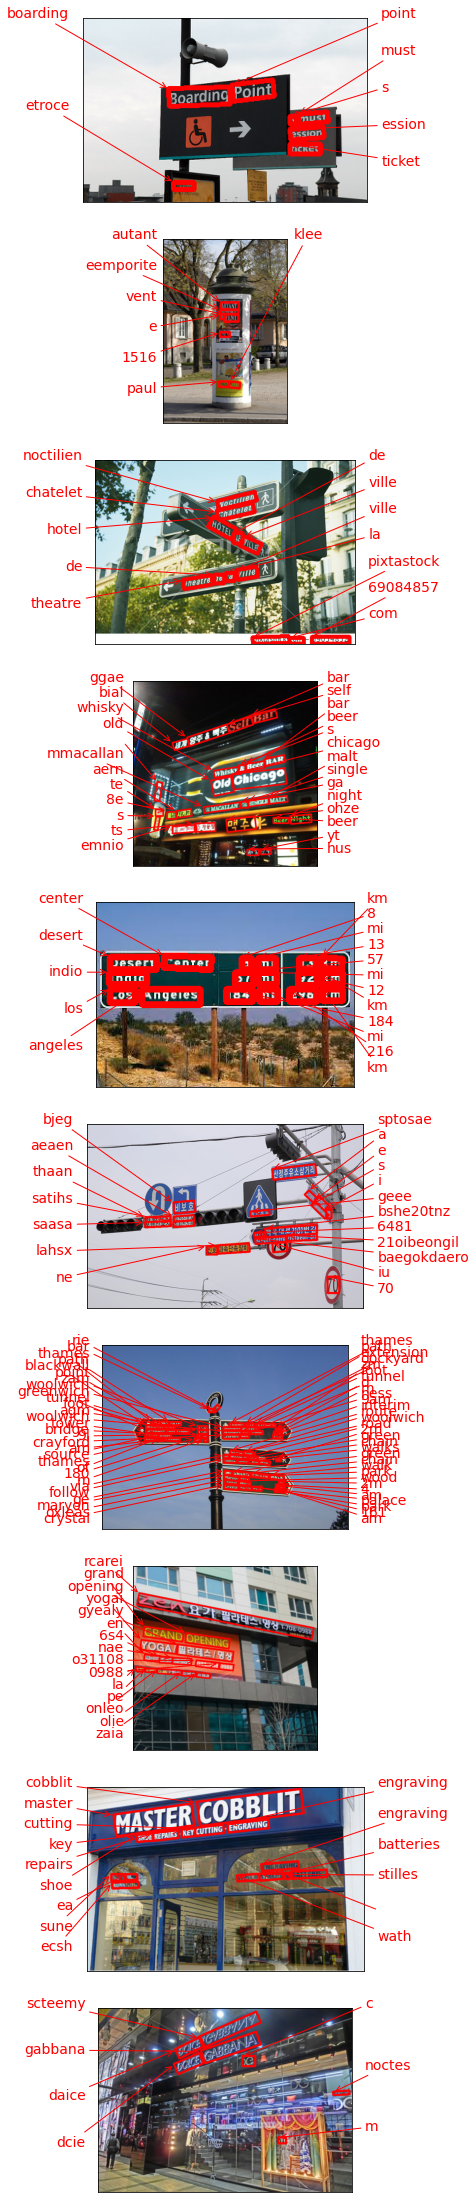

In [5]:
# 인식된 결과를 pyplot으로 시각화
fig, ax = plt.subplots(nrows=10, figsize=(40,40))
for idx, ax in enumerate(ax):
  keras_ocr.tools.drawAnnotations(image=images[idx],
                                  predictions=prediction_groups[idx][0], ax=ax)

# Step 2. 검증용 데이터셋 준비 및 테스트 시행(Tesseract)

이번에는 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식해 본다. 테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js 등으로 확장되는 등 많은 곳에서 사용되고 있다. 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116개 국어를 지원하고 있다.

오픈소스라는 점은 우리가 원하는 프로젝트에 활용하기 쉽다는 것을 의미한다. 그러니 직접 해 보면서 익혀두면 나중에 간단한 OCR 모델이 필요할 때 빠르게 활용할 수 있다!!

keras-ocr 때와 마찬가지로 의무는 아니지만 주피터 노트북에서 작업하기 때문에 이미지를 주피터에 업로드 할 때 복잡하게 보이지 않도록 하기 위해 먼저 ocr_python 안에 Tesseract라는 이름의 폴더를 새로 생성해 준다.

In [6]:
! mkdir -p ~/aiffel/ocr_python/Tesseract

테서랙트는 아래 명령어로 설치할 수 있지만, 클라우드 환경인 주피터 노트북에서 시행되므로 이 과정은 생략해도 무방하다.

```
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```

테서랙트를 사용하면 하나번에 이미지 내의 문자 검출과 인식을 할 수 있다. 우리는 OCR이 이뤄지는 전체 과정을 직접 거쳐보기 위해 검출을 먼저 해 보는 과정을 거친다.

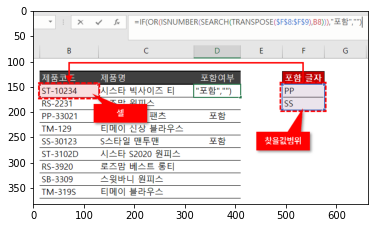

/aiffel/aiffel/ocr_python/Tesseract/0000.png
/aiffel/aiffel/ocr_python/Tesseract/0001.png
/aiffel/aiffel/ocr_python/Tesseract/0002.png
/aiffel/aiffel/ocr_python/Tesseract/0003.png
/aiffel/aiffel/ocr_python/Tesseract/0004.png
/aiffel/aiffel/ocr_python/Tesseract/0005.png
/aiffel/aiffel/ocr_python/Tesseract/0006.png
/aiffel/aiffel/ocr_python/Tesseract/0007.png
/aiffel/aiffel/ocr_python/Tesseract/0008.png
/aiffel/aiffel/ocr_python/Tesseract/0009.png
/aiffel/aiffel/ocr_python/Tesseract/0010.png
/aiffel/aiffel/ocr_python/Tesseract/0011.png
/aiffel/aiffel/ocr_python/Tesseract/0012.png
/aiffel/aiffel/ocr_python/Tesseract/0013.png
/aiffel/aiffel/ocr_python/Tesseract/0014.png
/aiffel/aiffel/ocr_python/Tesseract/0015.png
/aiffel/aiffel/ocr_python/Tesseract/0016.png
/aiffel/aiffel/ocr_python/Tesseract/0017.png
/aiffel/aiffel/ocr_python/Tesseract/0018.png
/aiffel/aiffel/ocr_python/Tesseract/0019.png
/aiffel/aiffel/ocr_python/Tesseract/0020.png
/aiffel/aiffel/ocr_python/Tesseract/0021.png
/aiffel/ai

In [7]:
import os
import pytesseract
from PIL import Image
import cv2
from pytesseract import Output
import matplotlib.pyplot as plt

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/Tesseract'
img_file_path = work_dir + '/Excel_img.png'   
img_bgr = cv2.imread(img_file_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

위 과정을 통해 본인이 가져온 엑셀 이미지에서 단어를 인식하고, 그 이미지를 해당 폴더에 정상적으로 저장하는데 성공했다. 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나오는 image_to_string()를 사용하게 된다. 이렇게 인식된 결과가 실제 이미지와 맞는지 확인하기 위해 아래와 같은 과정을 거친다!!

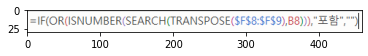

(0805440148태(568다(01464150056(『58:5559).88)))"포함","|



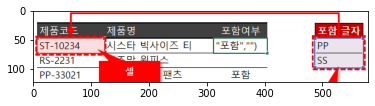

0 :          대  :                 1



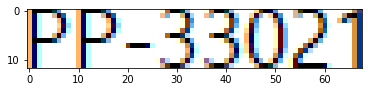

2231) |



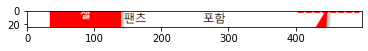

팬츠            포함                ~           ~



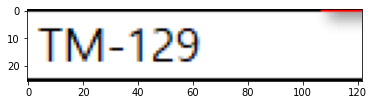

714-129



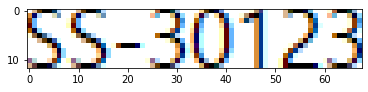

녹- [0 | 2



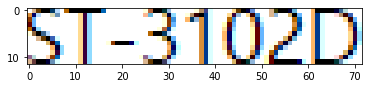

|-1ㅋ11021)



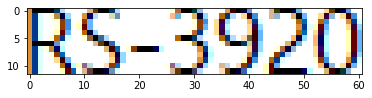

닛독-ㅋ492 )



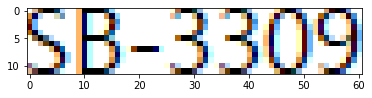

나[1-ㄱ[| )나



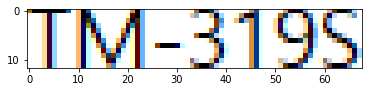

ㅣ 0/1-ㅋ| 너5



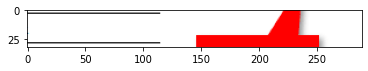

 . @



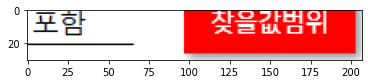

포함



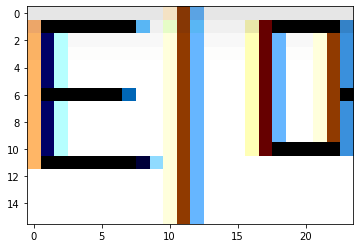

트



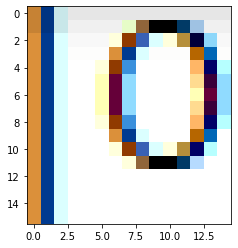

10



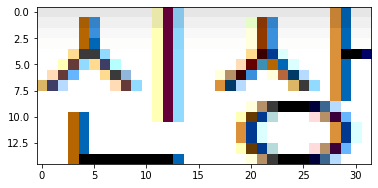

신상



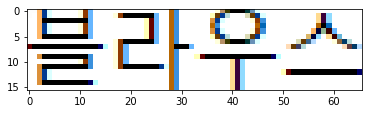

블라우스



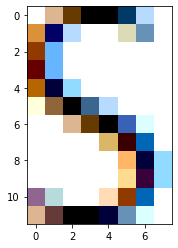

니



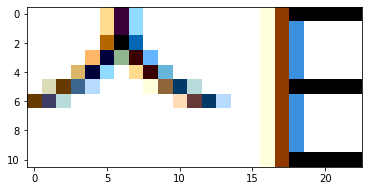

^~



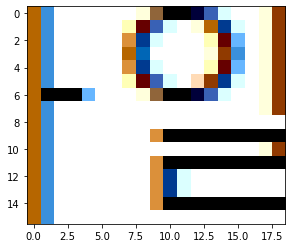

;일



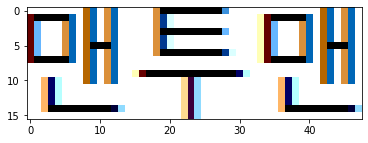

배두맨



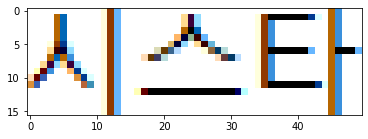

시스타



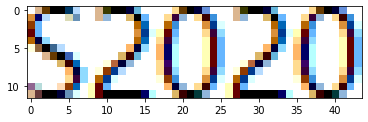

52) )



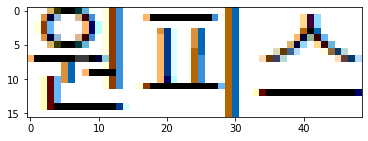

원피스



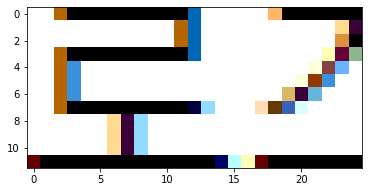

도 ~



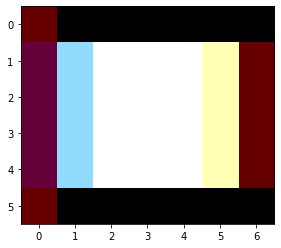

| |



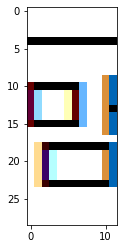

멈



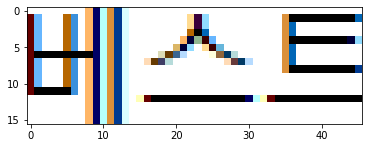

베스트



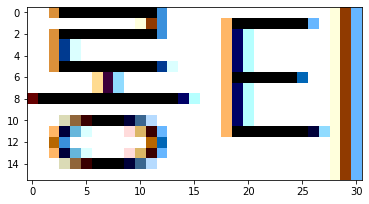

동티



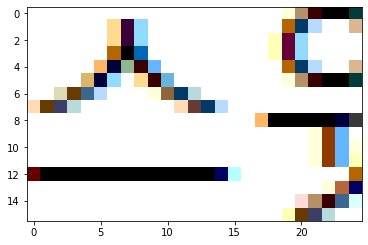

~ 두



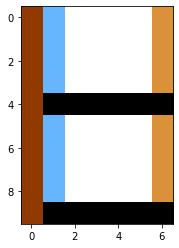

너



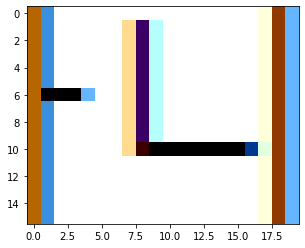

[니



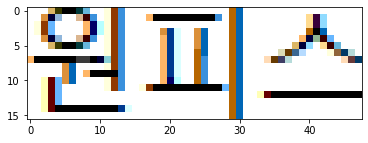

원피스



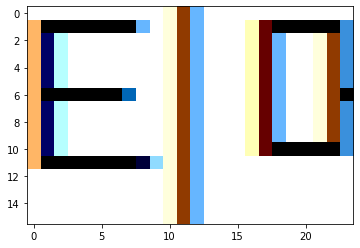

트



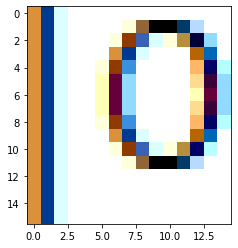

10



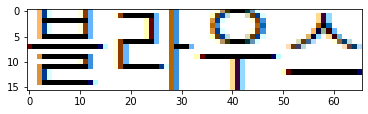

블라우스



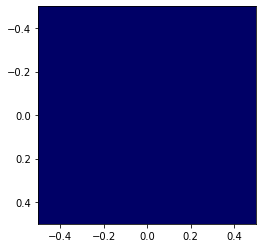

때

Done


In [8]:
def recognize_images_kor(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        
        import cv2
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images_kor(cropped_image_path_list)

# Step 3. 테스트 결과 정리

## 1) keras-ocr

* 본인의 경우는 일부러 한글이 들어간 간판 이미지와 표지만 이미지도 가져와서 시험을 해봤는데, 역시나 한글은 인지를 제대로 인지를 하지 못함을 다음 이미지를 통해 알 수 있었다. keras-ocr이 한글 데이터셋으로 훈련되어 있지 않은 모델이라는 점을 확실히 할 수 있었다.
(비보호는 bjeg로, 좌회전시는 aeaen으로 횡단보도는 geee로 인식하는 등등이다.)

* 그나마 인식하는 거 자체는 성능이 나름 괜찮은 거 같다. 아래처럼 한국어 간판 이미지의 경우도 엉뚱하게 인식이 되지만 인식 자체는 잘 된다는 것을 확인할 수 있다.

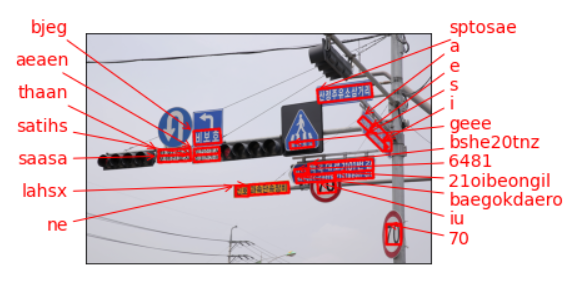
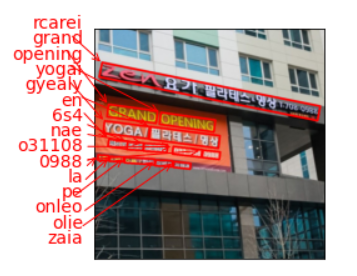

* 그리고 한글만 인식을 잘 못하는 것일 뿐이지 영단어와 숫자는 인식을 잘 하고 있는 편으로 보여진다. 위의 사진과 아래의 사진 모두 영단어와 숫자는 비교적 정확하게 인식을 하고 있다는 것을 확인할 수 있다.

* 다만 보는 사람에 따라서는 좀 난잡해 보일 수 있다는 문제점도 있다. 이게 단어 단위로 인식을 하다 보니 띄어쓰기가 좀 많이 되어 있어서 굉장히 많이 단어로 이루어진 간판 이미지나 표시판 이미지의 경우는 아래 이미지와 같이 상당히 보기가 좀 난잡한 면도 있다고 생각된다.

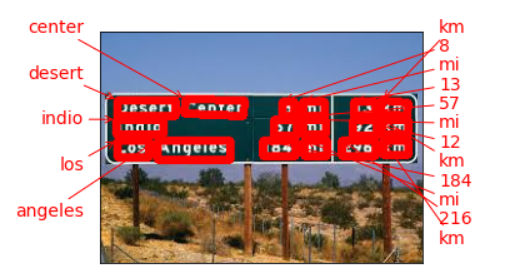
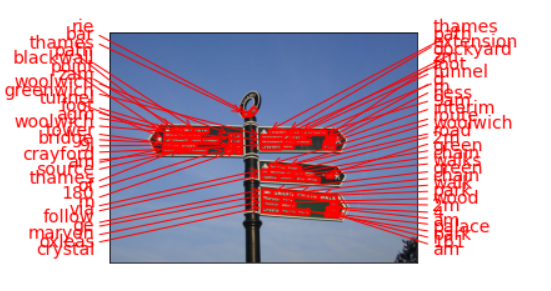

## 2) 테서랙트(Tesseract)

* 한글, 영단어, 숫자가 모두 포함된 엑셀 이미지 파일을 들여왔더니 역시나 keras-ocr에 비해서는 한글을 확실히 잘 인식하는 것 같아 보였다.

* 그런데 "lang=kor"으로 지정해서 그런지 오히려 영단어를 인식하지 못한 것처럼 보인다. 이미지 맨 윗부분의 함수로 이루어져 있는 부분(아래사진 참조)을 주목해보면 그 부분을 `(0805440148태(568다(01464150056(『58:5559).88)))"포함",""`라고 인식한 것을 보면 알 수 있다. 분명히 IF나 OR, ISNUMBER 등등 영단어가 분명이 있는데도 알 수 없는 숫자 혹은 이와 비슷하게 생긴 한글이나 숫자로 잘못 인식한 점이 보인다. 그 외에도 제품 코드번호에 나와 있는 알파벳 역시 잘못 인식한 점을 확인할 수 있었다. 이 결과를 보고 영어 알파벳과 한글을 모두 인식할 수 있도록 하는 방법이 있으면 좋을 텐데라고 생각했다.


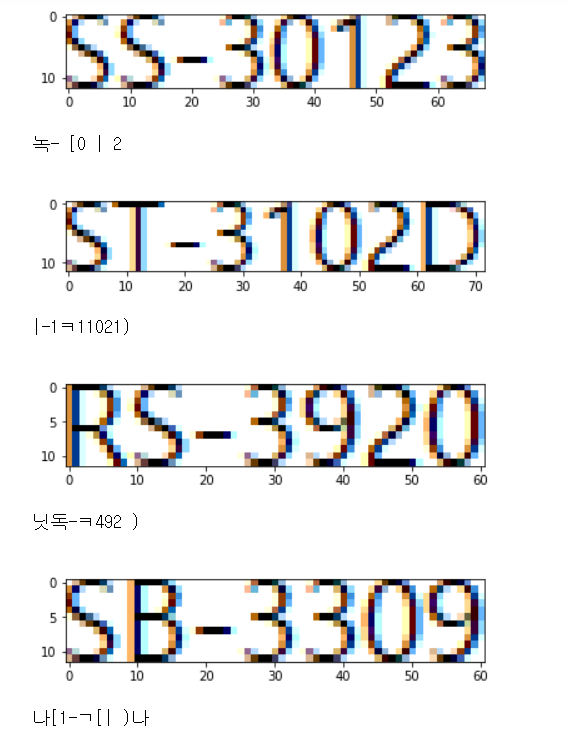

* 또한 글자도 아닌 이상한 픽셀 사진 같은 것도 저장이 되어 있었는데, 과연 어떤 문자를 인식하여 어떤 결과로 받아들였는지도 의구심이 들긴 했다. 첫 번째 사진 같은 경우는 글자를 크게 확대한 것처럼 보이기는 하는데, 두 번째 사진은 그냥 파란색 바탕으로만 이루어져 있고 글자라고 여겨지는 부분을 찾을 수 없었기 때문이다.

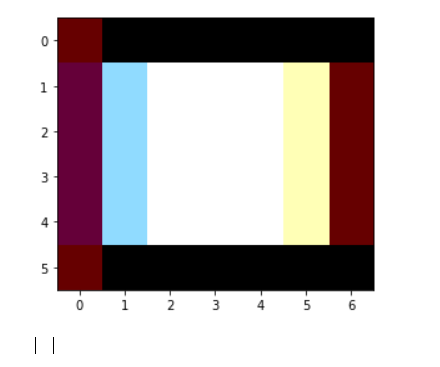
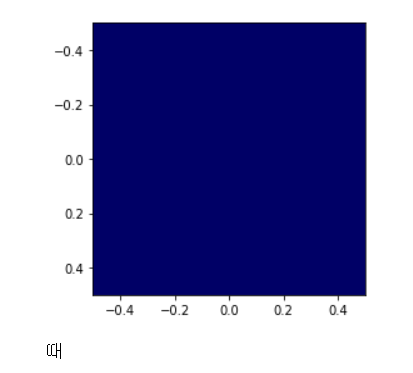

* 그래도 '시스타'는 '시스타'로, '원피스'는 '원피스'로, '블라우스'는 '블라우스'로 잘 인식했다는 것을 알 수 있다.

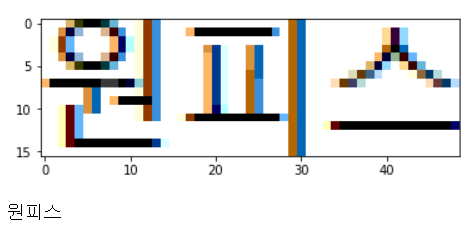
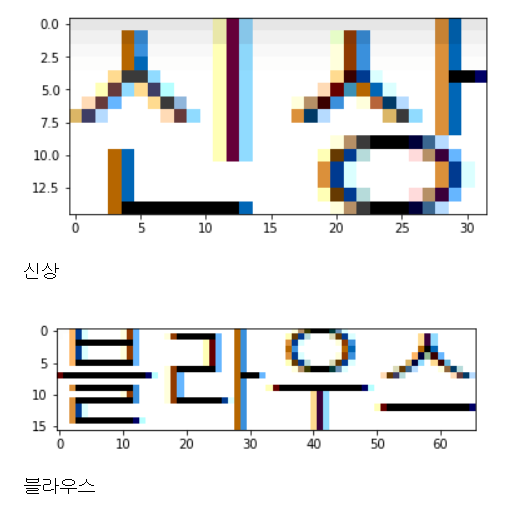

# Step4. 결과 분석과 결론 제시

"우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다."

#### (1) 구현하고자 하는 서비스

저 같은 경우는 아무래도 게임과 관련한 업계로 취업하는 걸 목표로 하고 있기 때문에 게임과 관련하여 글자 인식을 하고 최종적으로 오탈자를 가려내는 시스템을 구현할 수 있으면 좋겠다는 생각을 해봤다.

예를 들면 인게임에서 각 캐릭터들에 얽힌 스토리 설명이나, 캐릭터의 스킬에 대한 설명. 혹은 캐릭터들끼리 대화를 주고 받을 때의 대사 같은 부분을 인공지능이 정확히 인식할 수 있는 시스템을 말하는 것이다.

특히 외국에서 넘어온 게임 혹은 국내 제작 게임 중 글로벌 론칭을 하고 있는 게임 같은 경우에는 번역이 돼서 해당 설명이나 대사 같은 것들이 적혀 있을 텐데 이를 정확히 인지할 수 있는 시스템이 있으면 좋지 않을까 개인적으로 생각해 보았다. 그 대표적인 게임으로는 제가 자주 하는 게임 중에는 슈퍼셀에서 제작한 게임이 많은데 클래시 오브 클랜, 클래시 로얄, 그리고 슈퍼셀 게임 중에서도 제가 가장 밀고 있는 캐주얼 슈팅 게임인 브롤 스타즈, 또는 데브시스터즈라는 게임 회사가 개발한 러닝액션 게임인 쿠키런과 같은 게임이 있다.

캐릭터의 스킬에 대한 설명과 캐릭터들에 얽힌 스토리 설명, 아이템에 대한 설명, 시나리오를 진행함에 있어서 캐릭터들끼리 주고 받는 대화의 대사 등등이 표시될 때 일부 게임은 오탈자가 있거나 설명이 애매모호하게 적힌 부분들을 접할 수 있다. 이를 인지하고 수정을 좀 더 요긴하게 할 수 있는 시스템을 구현해 보고 싶다.

#### (2) 결과 분석 및 결론

keras-ocr은 단어 단위로 쪼개서 인식을 했고 keras-ocr이 한글 데이터셋으로 훈련되어 있지 않은 모델이라서 한글을 인식할 때 잘못 인식할 수 있다는 문제점이 있었지만,  
테서랙트(Tesseract)의 경우는 우선 한글 인식이 됐고, 한글로 번역되어서 표기된 화면 속의 문자를 제대로 인식할 수 있는 시스템을 구현하고자 하는 목표를 실현함에 있어 테서랙트가 좀 더 유용할 것이라고 생각된다.

# 회고

1. 일단 이번 노드에서는 광학 인식 시스템. 즉 문자가 포함된 이미지를 컴퓨터 인공지능이 인지할 수 있는 방법을 모색해 보는 시간을 가졌다. 처음 할 때는 이미지 내 문자를 색출해낸 후의 이미지가 굉장히 번잡했지만 알고보니 그냥 이미지 속의 문자를 인식했나보구나라는 제법 단순한 시각으로 접근하니 오히려 내용에 대한 이해가 쉽게 와닿았던 노드였다고 생각된다.

2. 이번 노드는 특히 내가 구현해 보고자 하는 시스템을 직접 설계할 수 있게 되었다는 점이 정말 새롭게 다가왔던거 같다. 본인은 아이펠 초창기 때부터 게임업계에 취업하고자 하는 목표 의식이 분명했기에 여기서 배운 것들의 대부분을 게임업계에 접목을 시키고 싶은 마음을 언제나 가지고 있었는데 이를 직접 실현해 보고 나니 기분이 되게 뿌듯했다. 아직 기획이나 이런 거는 햇병아리 수준에 불과하겠지만 계속해서 배움의 길을 정진해 나간다면 조만간 게임업계에서 크게 활약할 수 있는 나 자신을 발견하게 될지도 모른다.